In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy as sc

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/datasets"

test.csv  train.feather


In [5]:
!pip install feather-format

    100% |████████████████████████████████| 11.6MB 2.9MB/s 
  Running setup.py bdist_wheel for feather-format ... - \ done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built feather-format


In [5]:
#train_df = pd.read_feather("/content/gdrive/My Drive/datasets/train.feather")
train_df = pd.read_csv("train.csv")

/usr/local/lib/python3.6/dist-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


# Data Preprocessing Section and Feature Engineering

In [18]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134503e+01,-7.250972e+01,3.991985e+01,-7.251106e+01,3.992067e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [0]:
train_df = train_df[(train_df['fare_amount']>0)]
train_df = train_df[(train_df['fare_amount']<=50)]

In [0]:
#train_df = train_df[(train_df['pickup_latitude']>0)]
train_df = train_df[(train_df['pickup_latitude']>39)] #-->111 #there are only 20 <39 and 111 greater than 4 so removing them
train_df = train_df[(train_df['pickup_latitude']<42)]

In [0]:
train_df = train_df[(train_df['pickup_longitude']>-75)]
train_df = train_df[(train_df['pickup_longitude']<-72)]

In [0]:
train_df = train_df[(train_df['dropoff_longitude']>-75)]
train_df = train_df[(train_df['dropoff_longitude']<-72)]

In [0]:
train_df = train_df[(train_df['dropoff_latitude']>39)] #-->111 #there are only 20 <39 and 111 greater than 4 so removing them
train_df = train_df[(train_df['dropoff_latitude']<42)]

In [0]:
train_df = train_df[(train_df['passenger_count']>0)]

In [0]:
#Adding features based on date time parameter

In [0]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])

In [0]:
train_df['year'] = train_df['pickup_datetime'].dt.year

In [0]:
train_df['day'] = train_df['pickup_datetime'].dt.weekday

In [0]:
train_df["hour"] = pd.Series(train_df["pickup_datetime"].dt.hour.values,index = train_df.index)

**Spherical, Eucledian, Manhattan distance,location based features**

In [0]:
def distanceH(pickup1,pickup2,destination1,destination2):   #spherical distance  
    lat1, lon1 = pickup1,pickup2
    lat2, lon2 = destination1,destination2
    radius = 3959 # miles

    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = radius * c
    d = pd.Series(d,index = train_df.index)

    return d

In [0]:
def distanceE(pickup1,pickup2,destination1,destination2):  #Eucledian
    a = (destination1 - pickup1)*69
    b = (destination2 - pickup2)*69
    d = a**2+b**2
    c = np.sqrt(d)
    c = pd.Series(c,index = train_df.index)
    return c

In [0]:
def distanceM(pickup1,pickup2,destination1,destination2):
  c = np.abs((pickup1 - destination1)*69) + np.abs((pickup2 - destination2) * 69)
  c = pd.Series(c,index = train_df.index)
  return c
  
  

In [0]:
a = train_df['pickup_latitude'].values
b = train_df['pickup_longitude'].values
c = train_df['dropoff_latitude'].values
d = train_df['dropoff_longitude'].values

In [0]:
dist = distanceH(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values)
#dist = pd.Series(dist,index = train_df.index)
train_df['distance_sp'] = dist

In [0]:
dist1 = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values)
#dist1 = pd.Series(dist1,index = train_df.index)
train_df['distance_eucle'] = dist1


In [0]:
dist2 = distanceM(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values)
#dist2 = pd.Series(dist2,index = train_df.index)
train_df['distance_manh'] = dist2

In [0]:
train_df = train_df[(train_df['distance_eucle']<40)]

**Feature Engineering based on Location**

Central Park: 40.785091, -73.968285
Penn Station: 40.750580, -73.993584
Grand central: 40.7527° ,- 73.9772
La Gaurdia: 40.7769° ,- 73.8740
JFK: 40.6413° , 73.7781° 
Newark Airport: 40.6895° N, 74.1745° W







In [0]:
nyc1 = [40.785091, -73.968285]
nyc2 = [40.750580, -73.993584]
nyc3 = [40.7527 ,-73.9772]
nyc4 = [0.7769 ,-73.8740]
nyc5 = [40.6413 ,-73.7781 ]
nyc6 = [40.6895,-74.1745]


In [0]:
Central Park: 40.785091, -73.968285
Penn Station: 40.750580, -73.993584
Grand central: 40.7527° ,- 73.9772
La Gaurdia: 40.7769° ,- 73.8740
JFK: 40.6413° , 73.7781° 
Newark Airport: 40.6895° N, 74.1745° W


In [0]:
train_df["cp"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc1[0],nyc1[1])
train_df["ps"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc2[0],nyc2[1])
train_df["gc"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc3[0],nyc3[1])
train_df["lg"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc4[0],nyc4[1])
train_df["jf"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc5[0],nyc5[1])
train_df["nw"] = distanceE(train_df['pickup_latitude'].values,train_df['pickup_longitude'].values,nyc6[0],nyc6[1])
train_df["cp1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc1[0],nyc1[1])
train_df["ps1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc2[0],nyc2[1])
train_df["gc1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc3[0],nyc3[1])
train_df["lg1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc4[0],nyc4[1])
train_df["jf1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc5[0],nyc5[1])
train_df["nw1"] = distanceE(train_df['dropoff_latitude'].values,train_df['dropoff_longitude'].values,nyc6[0],nyc6[1])

In [1]:
train_df.to_csv('train1.feather')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_sp,distance_eucle,distance_manh
count,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07,5.337549e+07
mean,1.069499e+01,-7.397183e+01,4.075023e+01,-7.397065e+01,4.075037e+01,1.690683e+00,1.946789e+00,2.204092e+00,4.125143e-02
std,7.715761e+00,3.526749e-02,2.920402e-02,3.492744e-02,3.281778e-02,1.313596e+00,1.949486e+00,2.299361e+00,4.305605e-02
min,1.000000e-02,-7.499804e+01,3.903129e+01,-7.499828e+01,3.901662e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399233e+01,4.073690e+01,-7.399156e+01,4.073606e+01,1.000000e+00,7.746398e-01,8.786609e-01,1.626587e-02
50%,8.500000e+00,-7.398216e+01,4.075356e+01,-7.398064e+01,4.075404e+01,1.000000e+00,1.323486e+00,1.487754e+00,2.779770e-02
75%,1.250000e+01,-7.396863e+01,4.076767e+01,-7.396562e+01,4.076846e+01,2.000000e+00,2.371383e+00,2.605871e+00,4.954910e-02
max,5.000000e+01,-7.204471e+01,4.199717e+01,-7.201388e+01,4.199665e+01,2.080000e+02,6.005273e+01,5.998876e+01,1.227604e+00


# Pearson Coefficent

In [0]:
train_df_small = train_df.iloc[0:300000,]

In [29]:
#ana
train_df_small.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_sp,distance_eucle,distance_manh
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,10.714894,-73.976303,40.751472,-73.974617,40.751759,1.690723,1.951299,2.210012,0.041353
std,7.738379,0.035167,0.029479,0.035101,0.033186,1.307768,1.949647,2.299893,0.043002
min,0.010000,-74.968140,39.449402,-74.960022,39.449402,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992317,40.736938,-73.991508,40.736069,1.000000,0.776348,0.880396,0.016304
50%,8.500000,-73.982117,40.753662,-73.980598,40.754074,1.000000,1.325815,1.492152,0.027882
75%,12.500000,-73.968651,40.767632,-73.965515,40.768444,2.000000,2.379210,2.614583,0.049703
max,50.000000,-72.702873,41.800251,-72.694839,41.923820,6.000000,60.052727,59.974251,1.049328


In [56]:
#ana
train_df_small[train_df_small["fare_amount"]>60].count()

fare_amount          666
pickup_datetime      666
pickup_longitude     666
pickup_latitude      666
dropoff_longitude    666
dropoff_latitude     666
passenger_count      666
distance_sp          666
distance_eucle       666
dtype: int64

In [0]:
#2 and 3

In [22]:
#Eucledian distance vs fare amount
p_coef = sc.stats.pearsonr(train_df["distance_eucle"].values,train_df["fare_amount"].values)
p_coef

(0.87588155, 0.0)

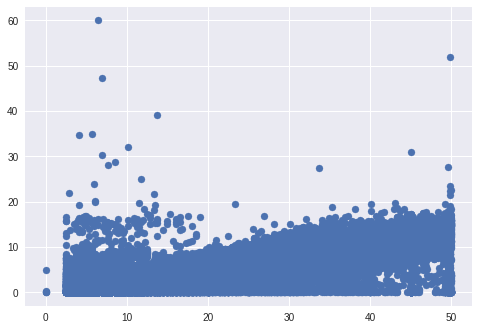

In [23]:
plt.scatter(train_df_small["fare_amount"].values, train_df_small["distance_eucle"].values )

From this we can observe though pearson coeffiecnt is quite high that there are still few outliers in our data for example for eucldian distance of 60 fare is less than 10 and for in many cases eucldian distance of 10 fare is 50, so though it shows some strong relationship eucledian distance is not a great parameter. One thing I will try to dind out is as NYC has grid road system we should only find out distance between lattitude and logitude and not the eucledian distance.

In [31]:
#Manhattan Distance to fare_amount
p_coef = sc.stats.pearsonr(train_df["distance_manh"].values,train_df["fare_amount"].values)
p_coef

(0.8584743, 0.0)

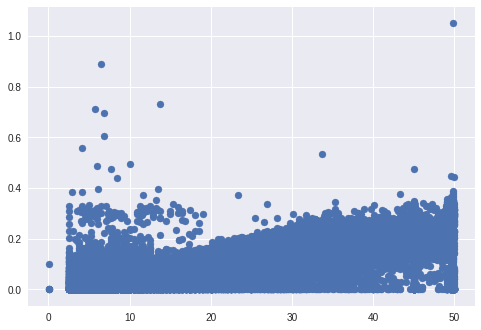

In [32]:
plt.scatter(train_df_small["fare_amount"].values, train_df_small["distance_manh"].values )

This at least shows some similarity but somehow pearson coefficent is less! moving on I hust realised why manhattan distance is called Manhattan Distance.

In [37]:
#Spherical distance vs fare amount
p_coef = sc.stats.pearsonr(train_df["distance_sp"].values,train_df["fare_amount"].values)
p_coef

(0.8684897, 0.0)

In [42]:
#time of day vs taxi fare
p_coef = sc.stats.pearsonr(train_df["pickup_datetime"].dt.hour.values,train_df["fare_amount"].values)
p_coef

(-0.017511104531376453, 0.0)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


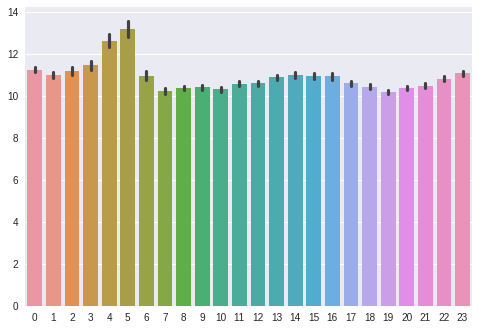

In [36]:
sns.barplot(x=train_df_small["pickup_datetime"].dt.hour.values,y=train_df_small["fare_amount"].values)

In [41]:
#pickup datetime vs distance
p_coef1 = sc.stats.pearsonr(train_df["pickup_datetime"].dt.hour.values,train_df["distance_eucle"].values)
p_coef1

(-0.02661902126030445, 0.0)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


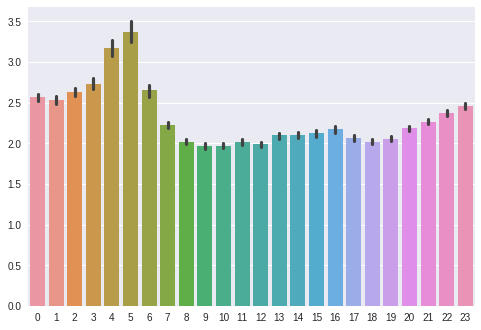

In [40]:
sns.barplot(x=train_df_small["pickup_datetime"].dt.hour.values,y=train_df_small["distance_eucle"].values)

# **Machine Learning Section**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [28]:
train_df.dtypes

fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    uint8
year                               int64
day                                int64
hour                               int64
distance_sp                      float32
distance_eucle                   float32
distance_manh                    float32
cp                               float32
ps                               float32
gc                               float32
lg                               float32
jf                               float32
nw                               float32
cp1                              float32
ps1                              float32
gc1                              float32
lg1                              float32
jf1                              float32
nw1             

In [0]:
param = ['hour','distance_eucle','year','day']

In [0]:
X = train_df.drop('fare_amount',axis=1)
y = train_df[['fare_amount']]


In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2)
                                                     


In [0]:
model=LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
pred = model.predict(X_valid)

In [23]:
loss = np.sqrt(mean_squared_error(y_valid,pred))
loss

4.695406882931351

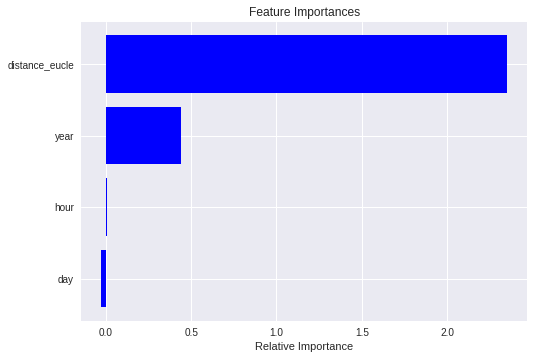

In [24]:
#ana
features = X_train.columns[:X_train.shape[1]]
importances = model.coef_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
test_df = pd.read_csv("/content/gdrive/My Drive/datasets/test.csv")

In [0]:
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])

In [0]:
test_df["hour"] = pd.Series(test_df["pickup_datetime"].dt.hour.values,index = test_df.index)

In [28]:
dist2 = distanceM(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values)
dist2 = pd.Series(dist2,index = test_df.index)
test_df['distance_manh'] = dist2

NameError: ignored

In [0]:
dist1 = distance1(test_df['pickup_latitude'].values,test_df['pickup_longitude'].values,test_df['dropoff_latitude'].values,test_df['dropoff_longitude'].values)
dist1 = pd.Series(dist1,index = test_df.index)
test_df['distance_eucle'] = dist1

In [0]:
test_df['year'] = test_df['pickup_datetime'].dt.year

In [0]:
test_df['day'] = test_df['pickup_datetime'].dt.weekday

In [0]:
pred = model.predict(test_df[param])

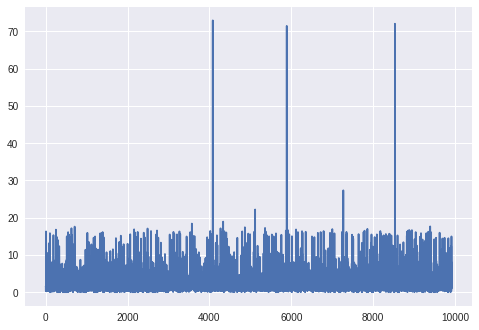

In [65]:
plt.plot(dist1)

In [35]:
submission2 = pd.DataFrame({"key": test_df['key'],"fare_amount": pred},columns = ['key','fare_amount'])
submission2.tail()

,key,fare_amount
9909,2015-05-10 12:37:51.0000002,10.208090
9910,2015-01-12 17:05:51.0000001,12.037926
9911,2015-04-19 20:44:15.0000001,42.087456
9912,2015-01-31 01:05:19.0000005,19.940935
9913,2015-01-18 14:06:23.0000006,9.004183


In [0]:
submission2.to_csv("submission2.csv", index = False)